# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

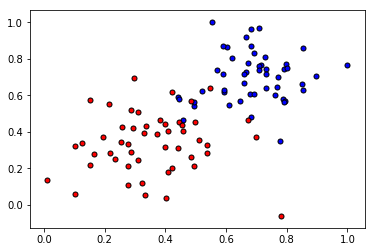

In [117]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [130]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    print("inside output formula")    
    print(features.shape, weights.shape, bias)
    print("XXXXXXXXXX")
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    y = np.array(y)
    output = np.array(output)
    return -np.sum(y * np.log(output) + (1-y) * np.log(1 - output))

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_hat = np.dot(x, weights) + bias
    weights += learnrate * (y - y_hat) * x
    bias += learnrate * (y - y_hat)
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [131]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    i = 0
    for e in range(epochs):
        i = i + 1
        print(i)
        print(features.shape)
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            print('hakai')
            print(x.shape, weights.shape)
            output = output_formula(x, weights, bias)
#             print(output)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

In [ ]:
train(X, y, epochs, learnrate, True)

1
(100, 2)
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.014735306358883484
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.023372543197132417
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.033575913660324974
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.04079900011406485
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.04968626146636656
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.05957947839173885
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.0672411493116775
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.07582412525035297
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.08266562906234004
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.09062705289340654
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.09846273985979037
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.1048899

hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.36491390628730264
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.37040205352259153
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.3762146325830719
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.380602667426851
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.3864377144325499
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.39080867335812547
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.39831410195095585
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.400921031491197
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.40353618129406577
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.4084006192008509
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.41585984669326237
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.4227163596369224
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.4268631315

8
(100, 2)
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.47907086955564554
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.4907793194966339
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.496911858613188
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5043901847977514
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5098452758116261
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5172247793100043
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.523751998785107
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5292220440591258
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5359903031031422
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5413540197905556
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5466556658488652
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5506553191863218
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.5546

hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6951848435743085
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6937207695566724
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6919041227291346
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6878235240574097
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6869248993857229
XXXXXXXXXX
inside output formula
(100, 2) (2,) 0.6835021707331657
XXXXXXXXXX

========== Epoch 10 ==========
Train loss:  65.17674449013704
Accuracy:  0.5
12
(100, 2)
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6835021707331657
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6938778741429351
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.6989486607328199
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.7052577789233997
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.7099742514557192
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.71671107860142

hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.9014947113709018
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8977893131384467
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8939400746541876
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8910489700115835
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8886898024699937
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8852818801568587
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8807024129696819
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8794093468446901
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8763633323314615
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8739594762801686
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8725154364359021
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.8702970269258741
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 0.86799782590843

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0612643610232733
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0561416906016918
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.053774391062789
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0520486228337342
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.049643275163121
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0467764343570083
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0439875354184431
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.040961380133663
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0377477151232692
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0373078704800203
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.03637018465601
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.0332334409703077
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.031642791789704
XXX

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2061567758374376
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2076561098733614
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2111324196142077
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2101896425778051
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2100760309017566
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.213516187304298
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.215302951365058
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2163996914208168
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2189329004777993
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2143071255967848
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2078678212738552
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.205900842190543
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2018097038116635


hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2419821518619447
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.245117268515327
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2461892526906282
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2464343834640754
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2478109552025143
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2521711864110614
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2529797934619902
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2549833197602784
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2565465768175226
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2611236979959972
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2624024478717144
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2630663429438984
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.269251617388278

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2692102930357676
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.270321145374369
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2683150458645358
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2685403099069497
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2706850706090373
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.275043204307152
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2793893763211552
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2823205376046798
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2861165778415504
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.287843074397574
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2914355647080358
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.293980749876392
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.2974300415096538
X

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3159625578763594
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.315342547071682
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.314598538533503
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3139135109749238
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3138322059292358
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3126837600037071
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3116897752968668
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3100755343899069
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3095258895337076
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.309220197852198
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3085471648423457
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3037748169619394
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3053845147942154


hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4098387706268833
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4082553625381415
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4045861653048872
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3994847065572265
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3966017606465244
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3963780075580177
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3962296128954728
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3938572412846248
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3929690090649656
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3906091322640362
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.3875698378554948
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.388350578348295
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.388182867128944

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.476976965455844
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.475275770632069
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4784395599313074
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4800720705759376
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4797478413831926
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.481468213842709
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4790217427908205
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.472912771460805
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4720826348576743
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4696139176714254
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4658012024757112
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4674952073996181
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4662438928373296
X

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4414505270556357
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4454699211661246
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4474608828755857
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4504012672469666
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4512474112032399
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.454508191670494
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.456561152283507
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4595942566726186
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4621279236447366
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4664958230482097
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4651785206043868
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4713818939866037
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4748585549720241

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.47059682294479
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4689753802039942
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4681723430729823
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4651624788863786
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4594026909313838
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4599264119945592
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4566814305630802
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.456689088054214
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.456132212642111
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4559796602959774
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4566921855939463
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.455677155464525
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4547402055506442
XX

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.532886545493801
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5363316069119086
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5386080459355618
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5404296071995052
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.546109797511228
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5453090765225066
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5492871024871309
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5454301569546383
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5433334375673609
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5464229331107622
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5480592680297398
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5473581599983235
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5488550916192854

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.497876358350713
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.497037731561711
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.4985210942719265
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5022716469411623
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5061724466280144
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5077862392585355
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5103716489420749
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5108869901362136
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5140347499466602
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5159182199066537
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5187992983533782
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5212859982389657
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.525562775601561


hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.529056293465552
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5291022498638105
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5277103921839907
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.526445767332248
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5240183237190348
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5215826652659592
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5200862771121755
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.519427676713965
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5164612349088764
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5105980221595778
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5112703760494341
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5079936373150913
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5082570064132397


hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5730976846532951
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5753722108426105
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.574743652580756
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.573217723385324
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5714732532667748
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5703896332388334
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5649056561012735
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.564636735367981
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5619819112081534
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5601411182702971
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5586001533797609
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5576270673194732
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5541694724871482


68
(100, 2)
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.520202398446672
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.523922889707872
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5246601207100339
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5258695105444267
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5277541598429238
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.53164611680711
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5306048100240712
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5314575836815107
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5341194491636072
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5364886760389684
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.536076610785505
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5319807511540298
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5310202

(2,) (2,)
inside output formula
(2,) (2,) 1.5606181921069968
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.560813164630946
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5587753061409968
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5557662910496175
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5570079457545056
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5570643026744984
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5558104933787746
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5545177165141506
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.552176422788595
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5498423361401517
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5484210084680265
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5478455406691969
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.544906861690693
XXXXXX

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5616094392093585
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5643733889760452
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5668641754121495
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.571062701150602
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5693449290314947
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5752011443710916
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5790364573243567
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5800103906984038
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5785596144080256
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5771872883230877
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5802511588227806
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5799495888191952
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.579206545579973

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5413500571564664
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5439205853351596
XXXXXXXXXX
inside output formula
(100, 2) (2,) 1.5403074643230157
XXXXXXXXXX
79
(100, 2)
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5403074643230157
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5436885611091333
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5443234556938403
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5453633058881133
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.547208494478984
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.551000022584436
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5497776513773829
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.55055562295562
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.553112235507416
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5554460594069466
XX

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.575745294113585
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5760773859338548
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5740691709501722
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5710506726937827
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.572305440410275
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5723487755380499
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.571186499640811
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5698591196155294
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5675761773069394
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5653125280848443
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5639370873813352
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5634096964416604
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5604892998337798


hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5916218193783007
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5882194560919813
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5831922667097342
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5796299957989706
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5801869582437593
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.581493467040069
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5793069583055253
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5796766626197516
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5776754865152778
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5746530787110185
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.575906999424044
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5759426965759613
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5748058754846208

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5994692483004769
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6054876015441417
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6080386263216344
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.611142442824038
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6129790250186926
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.614635883019361
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6205503621043202
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6191144367158898
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6233312801618813
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6188090753095827
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6163203421000636
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6193210507016766
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.6210788569858734

hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5719634254015096
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5740406076079316
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5741756553997328
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5772282823221784
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5789632127300204
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5816825773924335
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.584213274455361
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.588374350281772
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.586641967191142
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5923646328589527
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5963537404106332
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5974451150864184
XXXXXXXXXX
hakai
(2,) (2,)
inside output formula
(2,) (2,) 1.5959377707359803


In [100]:
print(X.shape, y.shape) 


(100, 2) (100,)
